In [3]:
# importar modulos / bibliotecas de funcion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

In [4]:
# Cargar el DataSet
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Aplicamos transpuesta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

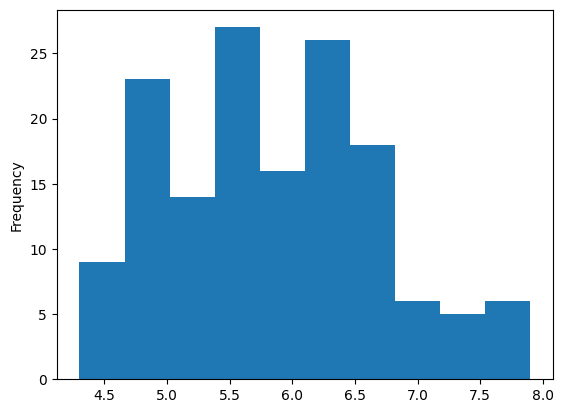

In [10]:
df.sepal_length.plot.hist();

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

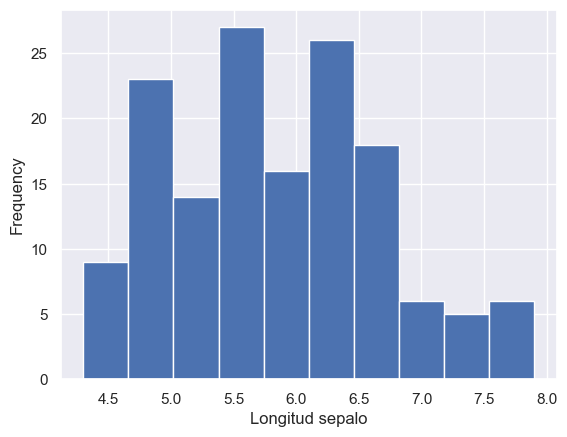

In [12]:
df.sepal_length.plot.hist()
plt.xlabel('Longitud sepalo');

In [13]:

import numpy as np


In [19]:
df['Segmento'] = np.where(df.sepal_length >= 6, 'alto',
                          np.where(df.sepal_length < 5, 'bajo', 'moderado'))

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,Segmento
0,5.1,3.5,1.4,0.2,setosa,moderado
1,4.9,3.0,1.4,0.2,setosa,bajo
2,4.7,3.2,1.3,0.2,setosa,bajo
3,4.6,3.1,1.5,0.2,setosa,bajo
4,5.0,3.6,1.4,0.2,setosa,moderado
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,alto
146,6.3,2.5,5.0,1.9,virginica,alto
147,6.5,3.0,5.2,2.0,virginica,alto
148,6.2,3.4,5.4,2.3,virginica,alto


In [21]:
df.groupby('Segmento')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
alto,67.0,6.610448,0.494557,6.0,6.3,6.50,6.850,7.9
bajo,22.0,4.690909,0.194958,4.3,4.6,4.75,4.875,4.9
moderado,61.0,5.416393,0.301762,5.0,5.1,5.50,5.700,5.9


# Estandarizacion de datos

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
col_a_escalar = ['sepal_length', 'sepal_width', 'petal_length','petal_width']

In [25]:
## Es un puntero lo que se tiene :), no una copia de los valores

datos_a_escalar = df[col_a_escalar]
datos_a_escalar


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
# Aqui si se copian los valores y no un puntero :)
datos_copia_a_escalar = df.copy()
datos_copia_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,species,Segmento
0,5.1,3.5,1.4,0.2,setosa,moderado
1,4.9,3.0,1.4,0.2,setosa,bajo
2,4.7,3.2,1.3,0.2,setosa,bajo
3,4.6,3.1,1.5,0.2,setosa,bajo
4,5.0,3.6,1.4,0.2,setosa,moderado
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,alto
146,6.3,2.5,5.0,1.9,virginica,alto
147,6.5,3.0,5.2,2.0,virginica,alto
148,6.2,3.4,5.4,2.3,virginica,alto


In [27]:
# Realiza el calculo de promedio, luego la desviacion y el valor Z para cada valor :o
datos_copia_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])

In [28]:
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species,Segmento
0,5.1,3.5,1.4,0.2,setosa,moderado
1,4.9,3.0,1.4,0.2,setosa,bajo
2,4.7,3.2,1.3,0.2,setosa,bajo
3,4.6,3.1,1.5,0.2,setosa,bajo
4,5.0,3.6,1.4,0.2,setosa,moderado
5,5.4,3.9,1.7,0.4,setosa,moderado
6,4.6,3.4,1.4,0.3,setosa,bajo
7,5.0,3.4,1.5,0.2,setosa,moderado
8,4.4,2.9,1.4,0.2,setosa,bajo
9,4.9,3.1,1.5,0.1,setosa,bajo


In [29]:
datos_copia_a_escalar.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,Segmento
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,moderado
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,bajo
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,bajo
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,bajo
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,moderado
5,-0.537178,1.939791,-1.169714,-1.052180,setosa,moderado
6,-1.506521,0.788808,-1.340227,-1.183812,setosa,bajo
7,-1.021849,0.788808,-1.283389,-1.315444,setosa,moderado
8,-1.748856,-0.362176,-1.340227,-1.315444,setosa,bajo
9,-1.143017,0.098217,-1.283389,-1.447076,setosa,bajo


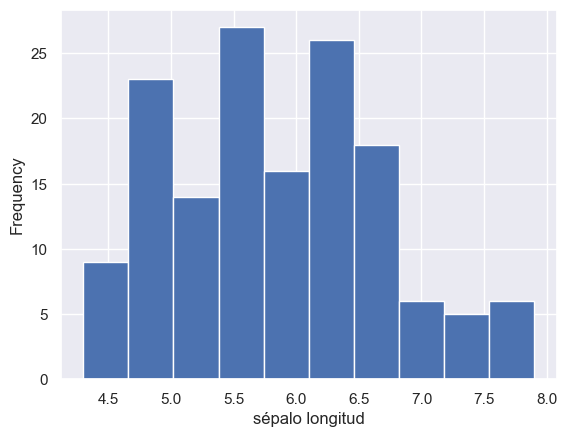

In [31]:
df.sepal_length.plot.hist()
plt.xlabel('sépalo longitud');

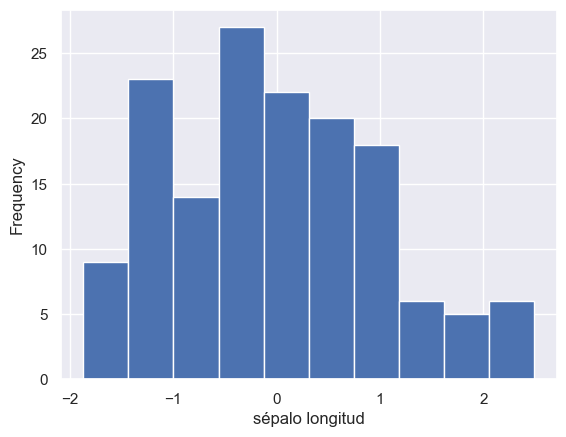

In [32]:
datos_copia_a_escalar['sepal_length'].plot.hist()
plt.xlabel('sépalo longitud');

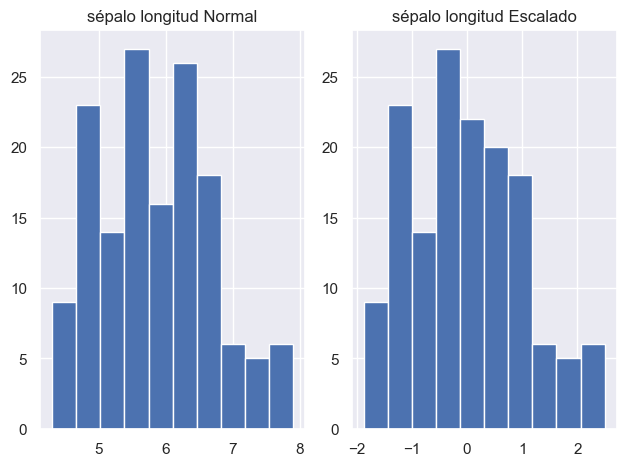

In [33]:
n_bins = 10
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)

axs[0].hist(df['sepal_length'], bins =n_bins)
axs[0].set_title('sépalo longitud Normal')
axs[ 1].hist(datos_copia_a_escalar['sepal_length'], bins =n_bins)
axs[ 1].set_title('sépalo longitud Escalado')

fig.tight_layout(pad=1.0);

In [38]:
cluster_cols = ['sepal_width', 'sepal_length']
datos_a_escalar[cluster_cols].head()


,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


C:\Users\axelg\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


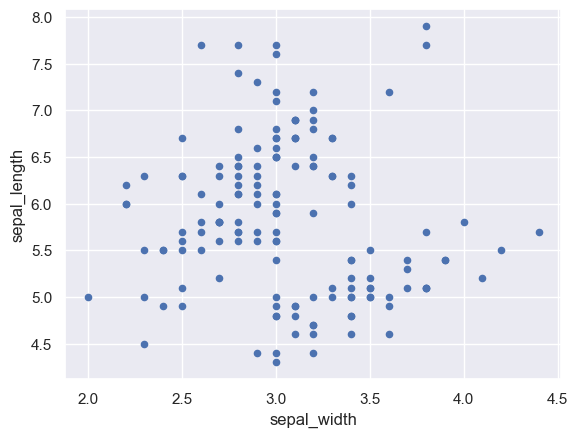

In [39]:
datos_a_escalar.plot.scatter( x= 'sepal_width', y= 'sepal_length');

# Uso de KMeans

In [41]:
from sklearn.cluster import KMeans

In [42]:
# Parametros para el modelo
modelo = KMeans(n_clusters = 5, random_state = 42, n_init= 100)

In [43]:
modelo.fit(datos_copia_a_escalar[cluster_cols]
          )

KMeans(n_clusters=5, n_init=100, random_state=42)

In [44]:
datos_copia_a_escalar['Cluster2'] = modelo.predict(datos_copia_a_escalar[cluster_cols])

In [45]:
datos_copia_a_escalar.Segmento.value_counts()

alto        67
moderado    61
bajo        22
Name: Segmento, dtype: int64

In [46]:
datos_copia_a_escalar.Cluster2.value_counts()

1    41
4    41
0    36
2    19
3    13
Name: Cluster2, dtype: int64

In [47]:
# Marcadores
# s=cuadrado, ^=triangulo, o=circulo
marcador = ['x', '*', '.', '|', '_']

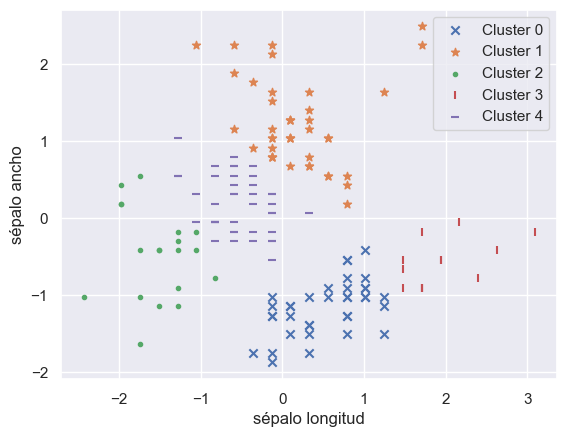

In [48]:
for segmento in range(5):
    temp = datos_copia_a_escalar[datos_copia_a_escalar.Cluster2 == segmento]
    plt.scatter(temp.sepal_width, temp.sepal_length, marker = marcador[segmento], label = 'Cluster '+ str(segmento))
plt.xlabel('sépalo longitud')
plt.ylabel('sépalo ancho')
plt.legend();

# utilizando mas de 2 dimenciones para el modelo de Machine Learning

In [50]:
cluster_cols2 = ['sepal_width', 'sepal_length', 'petal_length']
datos_copia_a_escalar[cluster_cols2].head()

,sepal_width,sepal_length,petal_length
0,1.019004,-0.900681,-1.340227
1,-0.131979,-1.143017,-1.340227
2,0.328414,-1.385353,-1.397064
3,0.098217,-1.506521,-1.283389
4,1.249201,-1.021849,-1.340227


In [51]:
modelo2 = KMeans(n_clusters = 8, random_state = 42, n_init= 100)
modelo2.fit(datos_copia_a_escalar[cluster_cols2])


KMeans(n_init=100, random_state=42)

In [52]:
datos_copia_a_escalar['Cluster3'] = modelo2.predict(datos_copia_a_escalar[cluster_cols2])

In [53]:
datos_copia_a_escalar.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Segmento,Cluster2,Cluster3
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,moderado,0,1
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,bajo,0,7
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,bajo,0,7
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,bajo,0,7
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,moderado,0,1


In [54]:
datos_copia_a_escalar.Segmento.value_counts()

alto        67
moderado    61
bajo        22
Name: Segmento, dtype: int64

In [55]:
datos_copia_a_escalar.Cluster3.value_counts()

6    39
0    29
1    21
2    19
7    17
4    12
3    10
5     3
Name: Cluster3, dtype: int64

In [56]:
# Marcadores
# s=cuadrado, ^=triangulo, o=circulo
marcador2 = ['x', '*', '.', '|', '_','s','^', 'o']

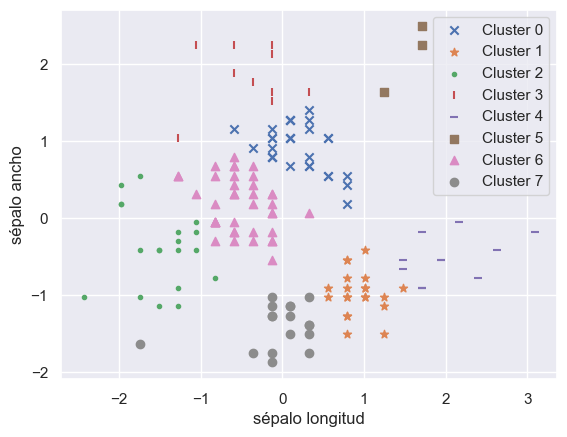

In [58]:
for segmento in range(8):
    temp = datos_copia_a_escalar[datos_copia_a_escalar.Cluster3 == segmento]
    plt.scatter(temp.sepal_width, temp.sepal_length, marker = marcador2[segmento], label = 'Cluster '+ str(segmento))
plt.xlabel('sépalo longitud')
plt.ylabel('sépalo ancho')
plt.legend();

In [59]:
from sklearn import decomposition

In [60]:
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(datos_a_escalar[cluster_cols2])

In [61]:
pca_res

array([[-2.49088018,  0.32097336],
       [-2.52334286, -0.17840062],
       [-2.71114888, -0.13782006],
       [-2.55775595, -0.31567523],
       [-2.53896432,  0.3313569 ],
       [-2.13542015,  0.75052335],
       [-2.67669609, -0.07294414],
       [-2.42912498,  0.16293168],
       [-2.70915877, -0.57231813],
       [-2.44080592, -0.12390824],
       [-2.30049402,  0.64153859],
       [-2.41545393,  0.01527354],
       [-2.5623262 , -0.24232295],
       [-3.03215612, -0.50249413],
       [-2.44677625,  1.17958596],
       [-2.2472496 ,  1.35344664],
       [-2.50197109,  0.8297773 ],
       [-2.49088018,  0.32097336],
       [-2.00936932,  0.86798447],
       [-2.42654485,  0.52407748],
       [-2.08991614,  0.37899402],
       [-2.41744404,  0.44977161],
       [-3.06144863,  0.15492154],
       [-2.19776537,  0.11292117],
       [-2.14054073, -0.04416692],
       [-2.30108404, -0.15410527],
       [-2.33748725,  0.1431182 ],
       [-2.3602591 ,  0.3650822 ],
       [-2.44279603,

In [62]:
datos_copia_a_escalar['pc1'] = pca_res[:,0]
datos_copia_a_escalar['pc2'] = pca_res[:,1]

In [63]:
datos_copia_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,species,Segmento,Cluster2,Cluster3,pc1,pc2
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,moderado,0,1,-2.490880,0.320973
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,bajo,0,7,-2.523343,-0.178401
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,bajo,0,7,-2.711149,-0.137820
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,bajo,0,7,-2.557756,-0.315675
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,moderado,0,1,-2.538964,0.331357
...,...,...,...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,alto,1,0,1.660591,0.219289
146,0.553333,-1.282963,0.705921,0.922303,virginica,alto,4,6,1.366886,-0.368303
147,0.795669,-0.131979,0.819596,1.053935,virginica,alto,1,0,1.582625,0.091444
148,0.432165,0.788808,0.933271,1.448832,virginica,alto,1,0,1.612547,0.157274


In [64]:
modelo_ing2 = KMeans(n_clusters = 4, random_state = 42, n_init= 100)
modelo_ing2.fit(datos_copia_a_escalar[cluster_cols2])
datos_copia_a_escalar['Cluster4'] = modelo_ing2.predict(datos_copia_a_escalar[cluster_cols2])

In [65]:
# Marcadores
# s=cuadrado, ^=triangulo, o=circulo
marcador_ing2 = ['x', '*', '.', '|', '_','s','^', 'o']

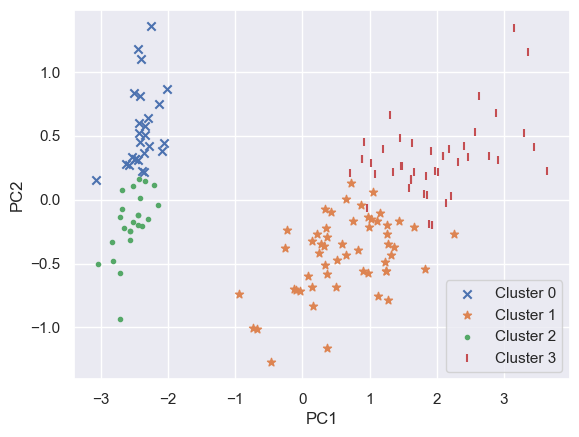

In [66]:
for segmento in range(4):
    temp = datos_copia_a_escalar[datos_copia_a_escalar.Cluster4 == segmento]
    plt.scatter(temp.pc1, temp.pc2, marker = marcador_ing2[segmento], label = 'Cluster '+ str(segmento))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();

In [67]:
col_segmento = ['sepal_length', 'sepal_width']
x = datos_a_escalar[col_segmento]

In [68]:
puntuacion_inercia = []
for k in range(2,11):
    inercia = KMeans(n_clusters = k, random_state = 42).fit(x).inertia_
    puntuacion_inercia.append(inercia)

C:\Users\axelg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\axelg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\axelg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\axelg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

# Entrenamiento de KMEANS

In [76]:
cliente = df[['sepal_length', 'sepal_width', 'petal_length']].copy()

In [77]:
# Crear modelo
km = KMeans(n_clusters=5, n_init=100, max_iter = 1000, init = 'random')

In [78]:
prediccion = km.fit_predict(cliente)

In [79]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [80]:
silhouette_score(cliente, prediccion)

0.48778868059511116

In [81]:
calinski_harabasz_score(cliente, prediccion)

498.4401818380206

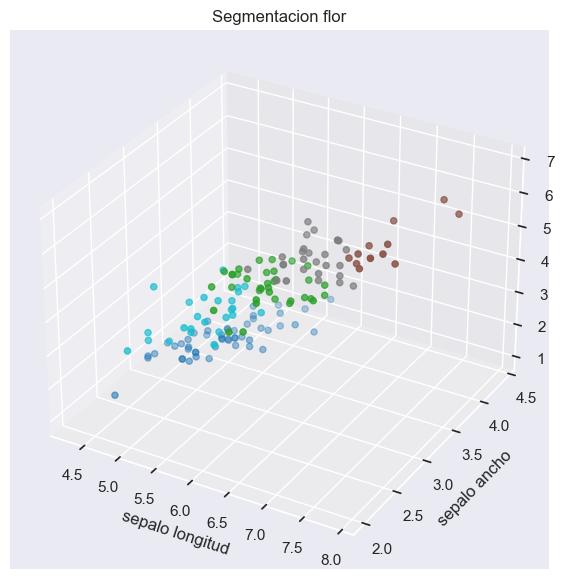

In [82]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = '3d')
ax.scatter3D(cliente['sepal_length'], cliente['sepal_width'], cliente['petal_length'], c =prediccion, cmap = 'tab10')
plt.title('Segmentacion flor')
ax.set_xlabel('sepalo longitud')
ax.set_ylabel('sepalo ancho')
ax.set_zlabel('Petalo longitud')
plt.show()